In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats("svg")
from torch.utils.data import DataLoader,TensorDataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from tqdm.auto import tqdm
import torchvision.transforms as transforms
print(device)

cuda


In [21]:
dataset=torchvision.datasets.CIFAR10(root="cifar10",download=True)

Files already downloaded and verified


In [25]:
images=torch.tensor(dataset.data).float().permute(0,3,1,2)/255
labels=torch.tensor(dataset.targets).long()
classes=dataset.classes

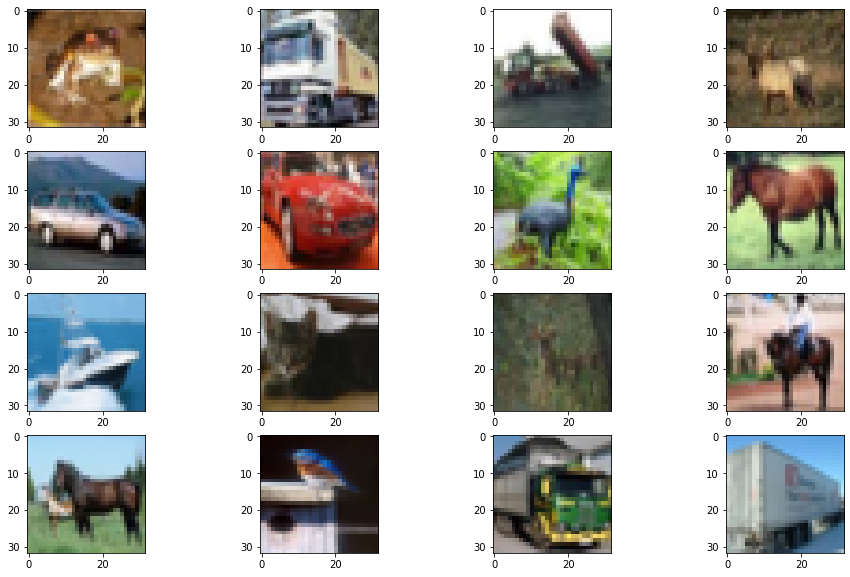

In [26]:
fig,axs=plt.subplots(4,4,figsize=(16,10))

for idx,ax in enumerate(axs.flatten()):
  ax.imshow(images[idx].permute(1,2,0))
  

In [28]:
train_dataset=TensorDataset(images,labels)
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)

In [29]:
next(iter(train_loader))[0].shape

torch.Size([32, 3, 32, 32])

In [30]:
def build_model():

    model=torchvision.models.vgg16(pretrained=True)
    # for p in model.parameters():
    #   p.requires_grad=False
    model.classifier[6]=nn.Linear(4096,10)


    lossfun=nn.CrossEntropyLoss()
    # optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0.9,weight_decay=5e-4)

    return model,lossfun,optimizer

In [37]:
def train_model(model,lossfun,optimizer):
  epochs=1
  train_acc=[]
  losses=[]

  model.to(device)
  model.train()
  for i in range(epochs):

    batch_loss=[]
    batch_train_acc=[]

    for x,y in tqdm(train_loader):
      
      x=x.to(device)
      y=y.to(device)

      yhat=model(x)
      loss=lossfun(yhat,y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      losses.append(loss.item())
      
      
      train_acc.append((torch.mean((torch.argmax(yhat,axis=1)==y).float()).item()*100))

    # losses.append(np.mean(batch_loss))
    # train_acc.append(np.mean(batch_train_acc))
    # print(np.mean(batch_loss))
    # print(np.mean(batch_train_acc))


  return losses,train_acc,model


In [38]:
model,lossfun,optimizer=build_model()
losses,train_acc,model=train_model(model,lossfun,optimizer)

  0%|          | 0/1563 [00:00<?, ?it/s]

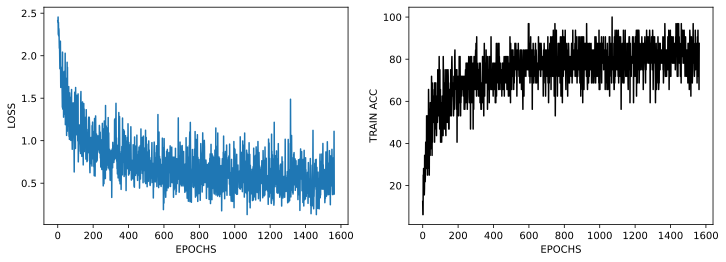

In [41]:
fig,axs=plt.subplots(1,2,figsize=(12,4))


axs[0].plot(losses)
axs[0].set_xlabel("EPOCHS")
axs[0].set_ylabel("LOSS")

axs[1].plot(train_acc,"k")
axs[1].set_xlabel("EPOCHS")
axs[1].set_ylabel("TRAIN ACC")

plt.show()